# Clustering con reducción de dimensionalidad (PCA)

El problema intenta responder a la pregunta de, si una institución internacional quiere otorgar ayuda financiera a los países más necesitados, ¿a qué países debería otorgarla?

Para responder a esta pregunta, se utilizará un conjunto de datos que contiene información sobre la salud, la población y la economía de diferentes países. El objetivo es agrupar los países en función de sus características para identificar a los países más necesitados.

El dataset está disponible en [Kaggle](https://www.kaggle.com/datasets/manusmitajha/countrydatacsv/data) y se ha copiado a continuación.

In [111]:
data_txt = """country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Afghanistan,90.2,10,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.1,76.5,2.89,4460
Angola,119,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
Argentina,14.5,18.9,8.1,16,18700,20.9,75.8,2.37,10300
Armenia,18.1,20.8,4.4,45.3,6700,7.77,73.3,1.69,3220
Australia,4.8,19.8,8.73,20.9,41400,1.16,82,1.93,51900
Austria,4.3,51.3,11,47.8,43200,0.873,80.5,1.44,46900
Azerbaijan,39.2,54.3,5.88,20.7,16000,13.8,69.1,1.92,5840
Bahamas,13.8,35,7.89,43.7,22900,-0.393,73.8,1.86,28000
Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76,2.16,20700
Bangladesh,49.4,16,3.52,21.8,2440,7.14,70.4,2.33,758
Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000
Belarus,5.5,51.4,5.61,64.5,16200,15.1,70.4,1.49,6030
Belgium,4.5,76.4,10.7,74.7,41100,1.88,80,1.86,44400
Belize,18.8,58.2,5.2,57.5,7880,1.14,71.4,2.71,4340
Benin,111,23.8,4.1,37.2,1820,0.885,61.8,5.36,758
Bhutan,42.7,42.5,5.2,70.7,6420,5.99,72.1,2.38,2180
Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.2,1980
Bosnia and Herzegovina,6.9,29.7,11.1,51.3,9720,1.4,76.8,1.31,4610
Botswana,52.5,43.6,8.3,51.3,13300,8.92,57.1,2.88,6350
Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.8,11200
Brunei,10.5,67.4,2.84,28,80600,16.7,77.1,1.84,35300
Bulgaria,10.8,50.2,6.87,53,15300,1.11,73.9,1.57,6840
Burkina Faso,116,19.2,6.74,29.6,1430,6.81,57.9,5.87,575
Burundi,93.6,8.92,11.6,39.2,764,12.3,57.7,6.26,231
Cambodia,44.4,54.1,5.68,59.5,2520,3.12,66.1,2.88,786
Cameroon,108,22.2,5.13,27,2660,1.91,57.3,5.11,1310
Canada,5.6,29.1,11.3,31,40700,2.87,81.3,1.63,47400
Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310
Central African Republic,149,11.8,3.98,26.5,888,2.01,47.5,5.21,446
Chad,150,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
Chile,8.7,37.7,7.96,31.3,19400,8.96,79.1,1.88,12900
China,15.7,26.3,5.07,22.6,9530,6.94,74.6,1.59,4560
Colombia,18.6,15.9,7.59,17.8,10900,3.86,76.4,2.01,6250
Comoros,88.2,16.5,4.51,51.7,1410,3.87,65.9,4.75,769
"Congo, Dem. Rep.",116,41.1,7.91,49.6,609,20.8,57.5,6.54,334
"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.7,60.4,4.95,2740
Costa Rica,10.2,33.2,10.9,35,13000,6.57,80.4,1.92,8200
Cote d'Ivoire,111,50.6,5.3,43.3,2690,5.39,56.3,5.27,1220
Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500
Cyprus,3.6,50.2,5.97,57.5,33900,2.01,79.9,1.42,30800
Czech Republic,3.4,66,7.88,62.9,28300,-1.43,77.5,1.51,19800
Denmark,4.1,50.5,11.4,43.6,44000,3.22,79.5,1.87,58000
Dominican Republic,34.4,22.7,6.22,33.3,11100,5.44,74.6,2.6,5450
Ecuador,25.1,27.9,8.06,32.4,9350,7.47,76.7,2.66,4660
Egypt,29.1,21.3,4.66,26.6,9860,10.1,70.5,3.19,2600
El Salvador,19.2,26.9,6.91,46.6,7300,2.65,74.1,2.27,2990
Equatorial Guinea,111,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100
Eritrea,55.2,4.79,2.66,23.3,1420,11.6,61.7,4.61,482
Estonia,4.5,75.1,6.03,68.7,22700,1.74,76,1.72,14600
Fiji,24.1,57.8,4.86,63.9,7350,4.23,65.3,2.67,3650
Finland,3,38.7,8.95,37.4,39800,0.351,80,1.87,46200
France,4.2,26.8,11.9,28.1,36900,1.05,81.4,2.03,40600
Gabon,63.7,57.7,3.5,18.9,15400,16.6,62.9,4.08,8750
Gambia,80.3,23.8,5.69,42.7,1660,4.3,65.5,5.71,562
Georgia,16.5,35,10.1,52.8,6730,8.55,72.8,1.92,2960
Germany,4.2,42.3,11.6,37.1,40400,0.758,80.1,1.39,41800
Ghana,74.7,29.5,5.22,45.9,3060,16.6,62.2,4.27,1310
Greece,3.9,22.1,10.3,30.7,28700,0.673,80.4,1.48,26900
Grenada,14.6,23.8,5.86,49.2,11200,0.48,71.3,2.24,7370
Guatemala,35.4,25.8,6.85,36.3,6710,5.14,71.3,3.38,2830
Guinea,109,30.3,4.93,43.2,1190,16.1,58,5.34,648
Guinea-Bissau,114,14.9,8.5,35.2,1390,2.97,55.6,5.05,547
Guyana,37.6,51.4,5.38,79.1,5840,5.73,65.5,2.65,3040
Haiti,208,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
Hungary,6,81.8,7.33,76.5,22300,2.33,74.5,1.25,13100
Iceland,2.6,53.4,9.4,43.3,38800,5.47,82,2.2,41900
India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,1350
Indonesia,33.3,24.3,2.61,22.4,8430,15.3,69.9,2.48,3110
Iran,19.3,24.4,5.6,19.4,17400,15.9,74.5,1.76,6530
Iraq,36.9,39.4,8.41,34.1,12700,16.6,67.2,4.56,4500
Ireland,4.2,103,9.19,86.5,45700,-3.22,80.4,2.05,48700
Israel,4.6,35,7.63,32.9,29600,1.77,81.4,3.03,30600
Italy,4,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800
Jamaica,18.1,31.3,4.81,49.6,8000,9.81,74.7,2.17,4680
Japan,3.2,15,9.49,13.6,35800,-1.9,82.8,1.39,44500
Jordan,21.1,48.3,8.04,69,9470,8.43,75.8,3.66,3680
Kazakhstan,21.5,44.2,4.29,29.9,20100,19.5,68.4,2.6,9070
Kenya,62.2,20.7,4.75,33.6,2480,2.09,62.8,4.37,967
Kiribati,62.7,13.3,11.3,79.9,1730,1.52,60.7,3.84,1490
Kuwait,10.8,66.7,2.63,30.4,75200,11.2,78.2,2.21,38500
Kyrgyz Republic,29.6,51.6,6.18,81.7,2790,10,68.5,3.1,880
Lao,78.9,35.4,4.47,49.3,3980,9.2,63.8,3.15,1140
Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300
Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860
Lesotho,99.7,39.4,11.1,101,2380,4.15,46.5,3.3,1170
Liberia,89.3,19.1,11.8,92.6,700,5.47,60.8,5.02,327
Libya,16.6,65.6,3.88,42.1,29600,14.2,76.1,2.41,12100
Lithuania,6.1,65.3,7.04,67.2,21100,2.38,73.2,1.5,12000
Luxembourg,2.8,175,7.77,142,91700,3.62,81.3,1.63,105000
"Macedonia, FYR",10.4,39.8,7.09,58.1,11400,2.04,74,1.47,4540
Madagascar,62.2,25,3.77,43,1390,8.79,60.8,4.6,413
Malawi,90.5,22.8,6.59,34.9,1030,12.1,53.1,5.31,459
Malaysia,7.9,86.9,4.39,71,21100,7.27,74.5,2.15,9070
Maldives,13.2,77.6,6.33,65.4,10500,2.88,77.9,2.23,7100
Mali,137,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
Malta,6.8,153,8.65,154,28300,3.83,80.3,1.36,21100
Mauritania,97.4,50.7,4.41,61.2,3320,18.9,68.2,4.98,1200
Mauritius,15,51.2,6,62.2,15900,1.13,73.4,1.57,8000
"Micronesia, Fed. Sts.",40,23.5,14.2,81,3340,3.8,65.4,3.46,2860
Moldova,17.2,39.2,11.7,78.5,3910,11.1,69.7,1.27,1630
Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
Montenegro,6.8,37,9.11,62.7,14000,1.6,76.4,1.77,6680
Morocco,33.5,32.2,5.2,43,6440,0.976,73.5,2.58,2830
Mozambique,101,31.5,5.21,46.2,918,7.64,54.5,5.56,419
Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
Namibia,56,47.8,6.78,60.7,8460,3.56,58.6,3.6,5190
Nepal,47,9.58,5.25,36.4,1990,15.1,68.3,2.61,592
Netherlands,4.5,72,11.9,63.6,45500,0.848,80.7,1.79,50300
New Zealand,6.2,30.3,10.1,28,32300,3.73,80.9,2.17,33700
Niger,123,22.2,5.16,49.1,814,2.55,58.8,7.49,348
Nigeria,130,25.3,5.07,17.4,5150,104,60.5,5.84,2330
Norway,3.2,39.7,9.48,28.5,62300,5.95,81,1.95,87800
Oman,11.7,65.7,2.77,41.2,45300,15.6,76.1,2.9,19300
Pakistan,92.1,13.5,2.2,19.4,4280,10.9,65.3,3.85,1040
Panama,19.7,70,8.1,78.2,15400,2.59,77.8,2.62,8080
Paraguay,24.1,55.1,5.87,51.5,7290,6.1,74.1,2.73,3230
Peru,20.3,27.8,5.08,23.8,9960,5.71,77.9,2.54,5020
Philippines,31.9,34.8,3.61,36.6,5600,4.22,69,3.16,2130
Poland,6,40.1,7.46,42.1,21800,1.66,76.3,1.41,12600
Portugal,3.9,29.9,11,37.4,27200,0.643,79.8,1.39,22500
Qatar,9,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300
Romania,11.5,32.6,5.58,38.8,17800,3.53,73.7,1.59,8230
Russia,10,29.2,5.08,21.1,23100,14.2,69.2,1.57,10700
Rwanda,63.6,12,10.5,30,1350,2.61,64.6,4.51,563
Samoa,18.9,29.2,6.47,53.1,5400,1.72,71.5,4.34,3450
Saudi Arabia,15.7,49.6,4.29,33,45400,17.2,75.1,2.96,19300
Senegal,66.8,24.9,5.66,40.3,2180,1.85,64,5.06,1000
Serbia,7.6,32.9,10.4,47.9,12700,5.88,74.7,1.4,5410
Seychelles,14.4,93.8,3.4,108,20400,-4.21,73.4,2.17,10800
Sierra Leone,160,16.8,13.1,34.5,1220,17.2,55,5.2,399
Singapore,2.8,200,3.96,174,72100,-0.046,82.7,1.15,46600
Slovak Republic,7,76.3,8.79,77.8,25200,0.485,75.5,1.43,16600
Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
Solomon Islands,28.1,49.3,8.55,81.2,1780,6.81,61.7,4.24,1290
South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280
South Korea,4.1,49.4,6.93,46.2,30400,3.16,80.1,1.23,22100
Spain,3.8,25.5,9.54,26.8,32500,0.16,81.9,1.37,30700
Sri Lanka,11.2,19.6,2.94,26.8,8560,22.8,74.4,2.2,2810
St. Vincent and the Grenadines,20.7,26.9,4.47,57.1,9920,4.44,71.6,2.07,6230
Sudan,76.7,19.7,6.32,17.2,3370,19.6,66.3,4.88,1480
Suriname,24.1,52.5,7.01,38.4,14200,7.2,70.3,2.52,8300
Sweden,3,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
Switzerland,4.5,64,11.5,53.3,55500,0.317,82.2,1.52,74600
Tajikistan,52.4,14.9,5.98,58.6,2110,12.5,69.6,3.51,738
Tanzania,71.9,18.7,6.01,29.1,2090,9.25,59.3,5.43,702
Thailand,14.9,66.5,3.88,60.8,13500,4.08,76.6,1.55,5080
Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600
Togo,90.3,40.2,7.65,57.3,1210,1.18,58.7,4.87,488
Tonga,17.4,12.4,5.07,60.3,4980,3.68,69.9,3.91,3550
Tunisia,17.4,50.5,6.21,55.3,10400,3.82,76.9,2.14,4140
Turkey,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10700
Turkmenistan,62,76.3,2.5,44.5,9940,2.31,67.9,2.83,4440
Uganda,81,17.1,9.01,28.6,1540,10.6,56.8,6.15,595
Ukraine,11.7,47.1,7.72,51.1,7820,13.4,70.4,1.44,2970
United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.5,76.5,1.87,35000
United Kingdom,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900
United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400
Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900
Uzbekistan,36.3,31.7,5.81,28.5,4240,16.5,68.8,2.34,1380
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63,3.5,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500
Vietnam,23.3,72,6.84,80.2,4490,12.1,73.1,1.95,1310
Yemen,56.3,30,5.18,34.4,4480,23.6,67.5,4.67,1310
Zambia,83.1,37,5.89,30.9,3280,14,52,5.4,1460"""

## Configuración del entorno de trabajo

In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

## Carga de los datos

In [114]:
data = StringIO(data_txt)
df = pd.read_csv(data)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90,10,8,45,1610,9,56,6,553
1,Albania,17,28,7,49,9930,4,76,2,4090
2,Algeria,27,38,4,31,12900,16,76,3,4460
3,Angola,119,62,3,43,5900,22,60,6,3530
4,Antigua and Barbuda,10,46,6,59,19100,1,77,2,12200


Cada columna del dataset indica lo siguiente:

- **country**: nombre del país
- **child_mort**: mortalidad de niños menores de 5 años por cada 1000 nacidos vivos
- **exports**: exportaciones de bienes y servicios per cápita. Dado en dólares
- **health**: gasto en salud per cápita. Dado en dólares
- **imports**: importaciones de bienes y servicios per cápita. Dado en dólares
- **income**: ingreso neto per cápita. Dado en dólares
- **inflation**: tasa de inflación anual
- **life_expec**: esperanza de vida al nacer
- **total_fer**: número promedio de hijos por mujer
- **gdpp**: producto interno bruto per cápita. Dado en dólares

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [116]:
df.describe(include = "all")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167,167,167,167,167,167,167,167,167
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38,41,7,47,17145,8,71,3,12964
std,NaN,40,27,3,24,19278,11,9,2,18329
min,NaN,3,0,2,0,609,-4,32,1,231
25%,NaN,8,24,5,30,3355,2,65,2,1330
50%,NaN,19,35,6,43,9960,5,73,2,4660
75%,NaN,62,51,9,59,22800,11,77,4,14050


In [117]:
df["country"].describe()

count             167
unique            167
top       Afghanistan
freq                1
Name: country, dtype: object

In [118]:
print("\nNúmero de valores nulos en alguna de las columnas:\n\n", df.isnull().sum())


Número de valores nulos en alguna de las columnas:

 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


## Análisis

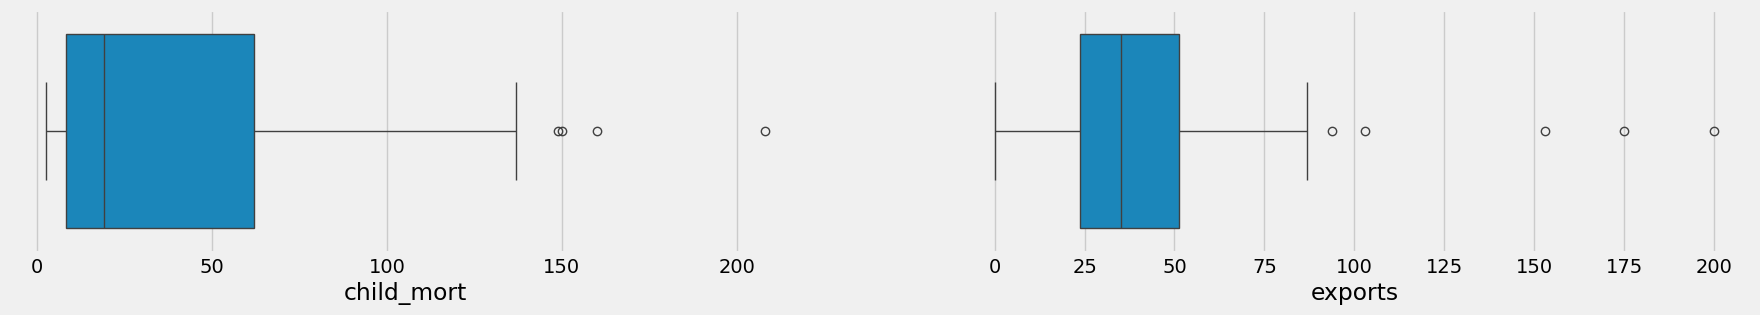

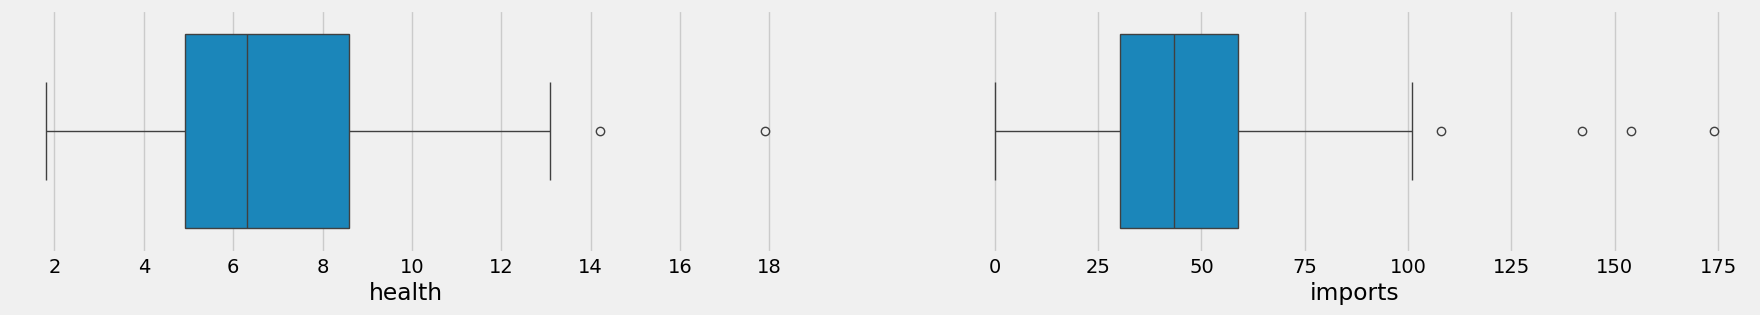

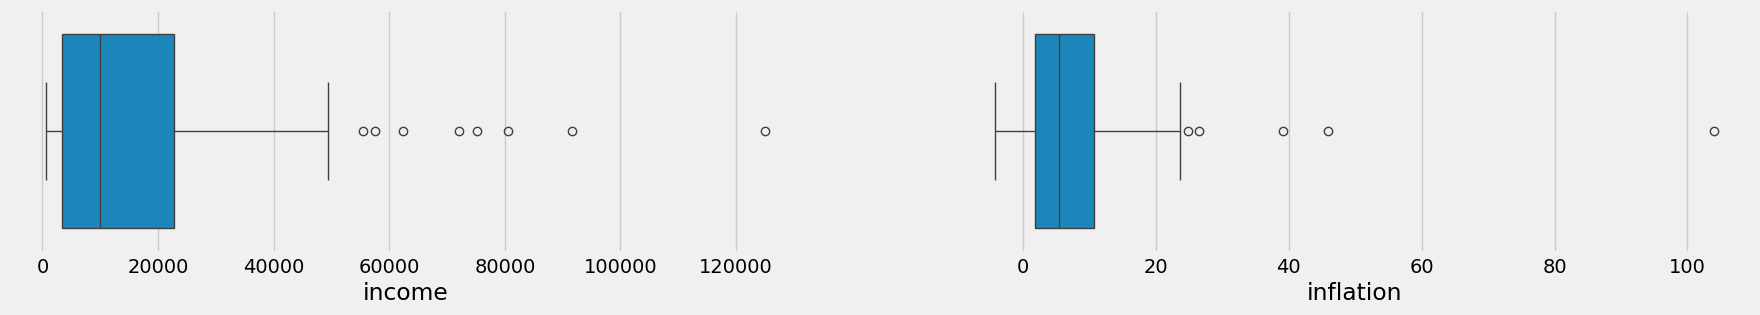

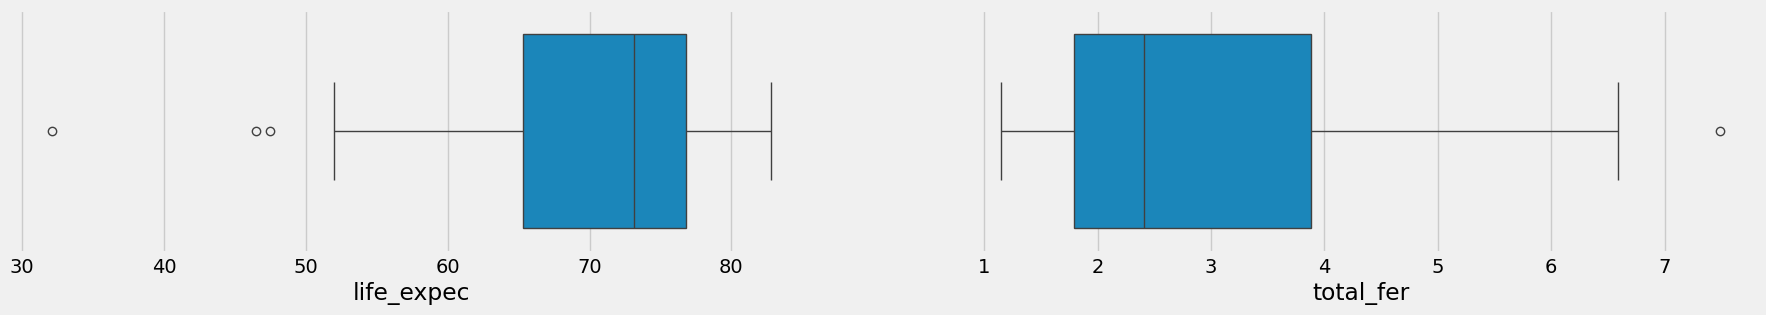

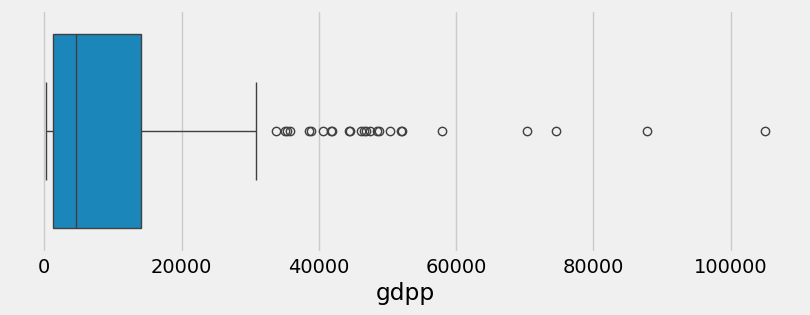

In [119]:
Numerical = ["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
i = 0
while i<10:
    fig = plt.figure(figsize=(20,3))
    plt.subplot(1,2,1)
    sns.boxplot(x=Numerical[i],data =df)
    i += 1
    if i == 9:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[i], data=df)
    i += 1
    plt.show()

In [120]:
df2 = df.drop(columns= ["country"])
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90,10,8,45,1610,9,56,6,553
1,17,28,7,49,9930,4,76,2,4090
2,27,38,4,31,12900,16,76,3,4460
3,119,62,3,43,5900,22,60,6,3530
4,10,46,6,59,19100,1,77,2,12200
...,...,...,...,...,...,...,...,...,...
162,29,47,5,53,2950,3,63,4,2970
163,17,28,5,18,16500,46,75,2,13500
164,23,72,7,80,4490,12,73,2,1310
165,56,30,5,34,4480,24,68,5,1310


## PCA: Principal Component Analysis

In [121]:
# print with 2 decimal positions
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# deactivating scientific notation
np.set_printoptions(suppress=True)
# no horizontal print limit in standard python print
np.set_printoptions(linewidth=np.inf)

In [122]:
pca = PCA(n_components = 9)
pca1 = pca.fit_transform(df2)
ex_variance = pca.explained_variance_ratio_
sum_ex_variance = np.cumsum(ex_variance)
print("Explained variance ratio:",ex_variance)
print("Cumulative explained variance:",sum_ex_variance)

Explained variance ratio: [0.94792307 0.05207346 0.00000177 0.00000139 0.00000019 0.0000001  0.00000002 0.00000001 0.        ]
Cumulative explained variance: [0.94792307 0.99999653 0.99999829 0.99999968 0.99999987 0.99999997 0.99999999 1.         1.        ]


In [123]:
pca_new =  PCA(n_components = 2)
pca_new2 = pca_new.fit_transform(df2)
ex_variance_2 = pca_new.explained_variance_ratio_
sum_ex_variance_2 = np.cumsum(pca_new.explained_variance_ratio_)
print("Explained variance ratio:" ,ex_variance_2)
print("Cumulative explained variance:", sum_ex_variance_2)

Explained variance ratio: [0.94792307 0.05207346]
Cumulative explained variance: [0.94792307 0.99999653]


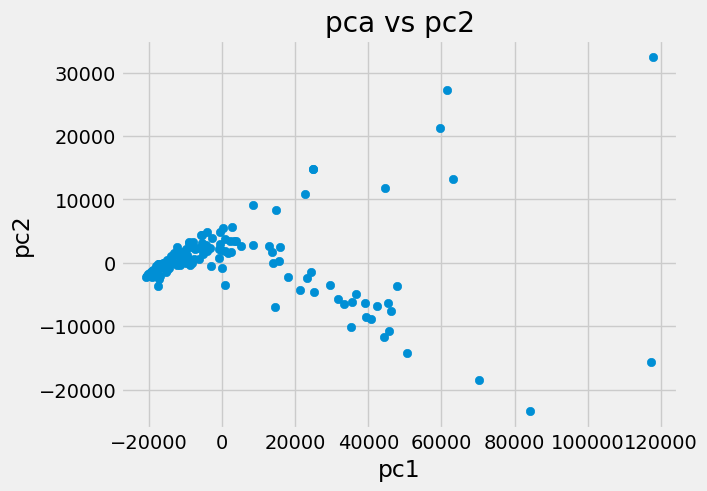

In [124]:
plt.scatter(pca_new2[: , 0] , pca_new2[: , 1])
plt.title("pca vs pc2")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

El PCA nos indica que con solo las dos primeras componentes principales, se puede explicar el 99% de la varianza de los datos. Por lo tanto, se utilizarán estas dos componentes para realizar el clustering.

Hemos transformado un conjunto de datos de 9 dimensiones en un conjunto de datos de 2 dimensiones. Ahora, podemos aplicar un algoritmo de clustering para agrupar los países en función de sus características.

## Clustering model

Comenzamos escalando los resultados del PCA y luego aplicamos el algoritmo de clustering KMeans varias veces para encontrar el número óptimo de clusters.

In [125]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(pca_new2)

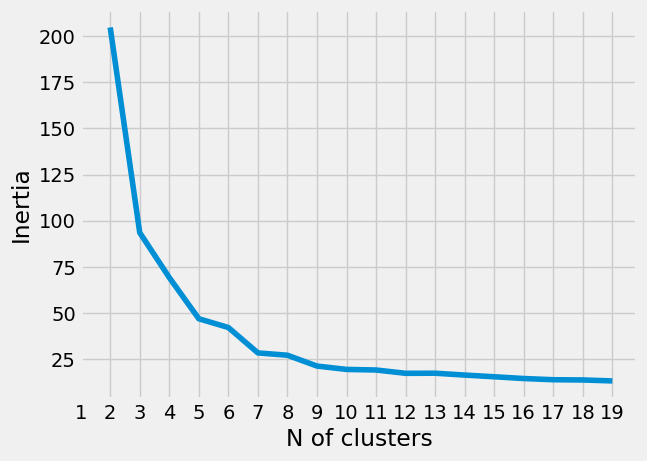

In [126]:
List = []
for k in range(2,20):
    kmeans = KMeans(n_clusters = k , init = "random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(scaled_feat)
    List.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(2,20) , List)
plt.xticks(range(1,20))
plt.xlabel("N of clusters")
plt.ylabel("Inertia")
plt.show()

Número óptimo de clústers: 7


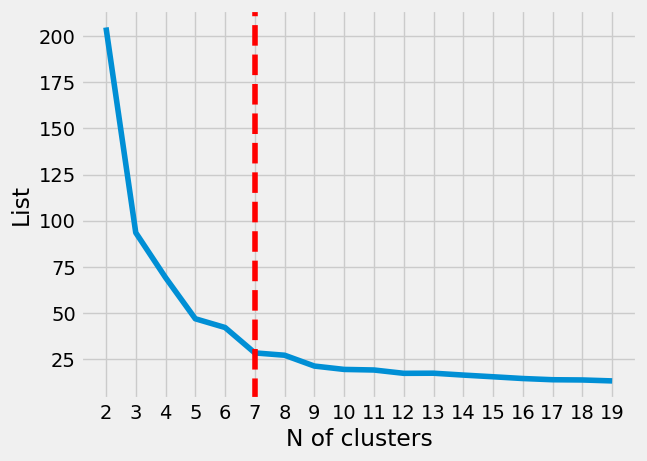

In [128]:
k1= KneeLocator(range(2,20) , List , curve = "convex", direction = "decreasing" )
print("Número óptimo de clústers:", k1.elbow)

plt.style.use("fivethirtyeight")
plt.plot(range(2,20) , List)
plt.xticks(range(2,20))
plt.xlabel("N of clusters")
plt.ylabel("List")
plt.axvline(x = k1.elbow,color = "r", label ="axvline_fullheight", ls = "--")
plt.show()

Alternativamente, para cada número de clúsers, se calcula el coeficiente de silueta para evaluar la calidad de los clusters.

El coeficiente de silueta es una medida de cuán similar es un objeto a su propio clúster (cohesión) en comparación con otros clústeres (separación). El valor del coeficiente de silueta oscila entre -1 y 1. Si el coeficiente de silueta es 1, el objeto es muy similar a su propio clúster y muy diferente de los clústeres vecinos. Si es 0, el objeto es indiferente a los clústeres vecinos y si es -1, el objeto es muy diferente a su propio clúster y muy similar a los clústeres vecinos.

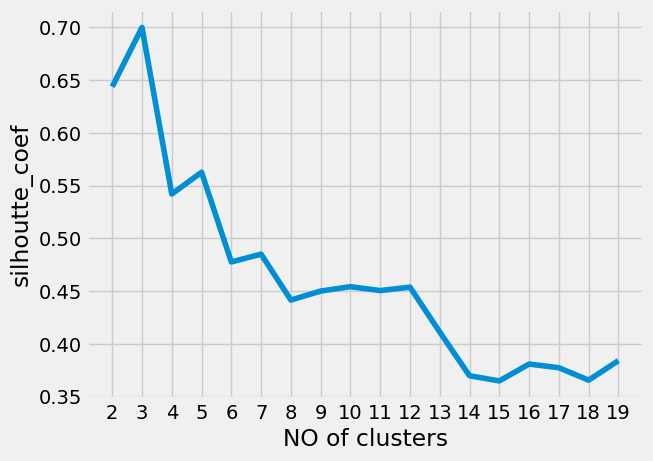

In [129]:
sil_coef = []
for k in range(2,20):
    kmeans = KMeans(n_clusters = k , init = "random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(scaled_feat)
    score = silhouette_score(scaled_feat,kmeans.labels_)
    sil_coef.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2,20) ,sil_coef )
plt.xticks(range(2,20))
plt.xlabel("NO of clusters")
plt.ylabel("silhoutte_coef")
plt.show()

De acuerdo a ambas métricas, el número óptimo de clusters es 3, ya que en la gráfica de la inercia se observa un cambio de tendencia en ese punto y el coeficiente de silueta es el más alto.

### Resultado

In [130]:
km_finall = KMeans(n_clusters = 3 , init = "random", n_init=10, max_iter=300, random_state=42)
km_finall.fit(pca_new2)
centroid_final = km_finall.cluster_centers_
print(centroid_final)

[[-14539.17295507   -134.65733888]
 [ 53565.22775261  -3030.63094957]
 [ 10079.13182266   2410.91890796]]


In [131]:
y_pred = km_finall.predict(pca_new2)
output = pd.DataFrame(y_pred)
df.insert(1, "cluster", output)
df

,country,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,0,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,0,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,0,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,2,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,0,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
163,Venezuela,2,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500
164,Vietnam,0,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,Yemen,0,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310


## Conclusiones

,country,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,0,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,0,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,0,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
6,Armenia,0,18.10,20.80,4.40,45.30,6700,7.77,73.30,1.69,3220
...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,0,36.30,31.70,5.81,28.50,4240,16.50,68.80,2.34,1380
162,Vanuatu,0,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
164,Vietnam,0,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,Yemen,0,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310


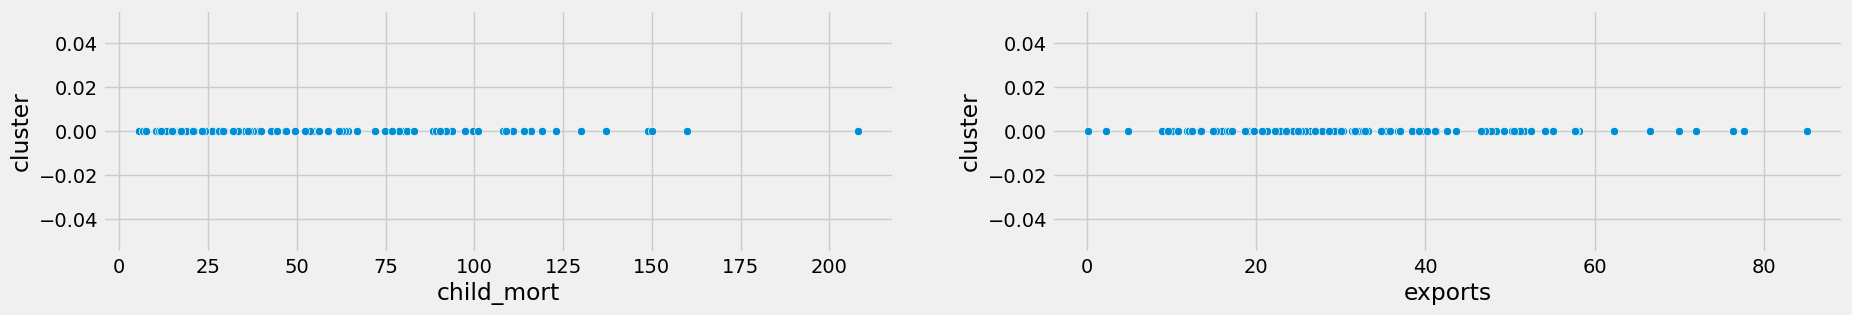

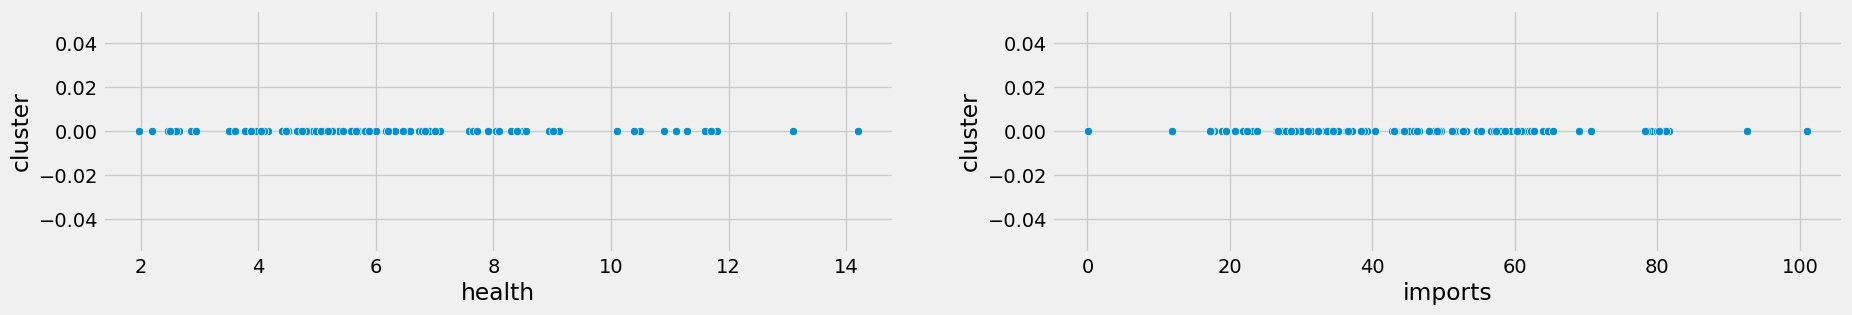

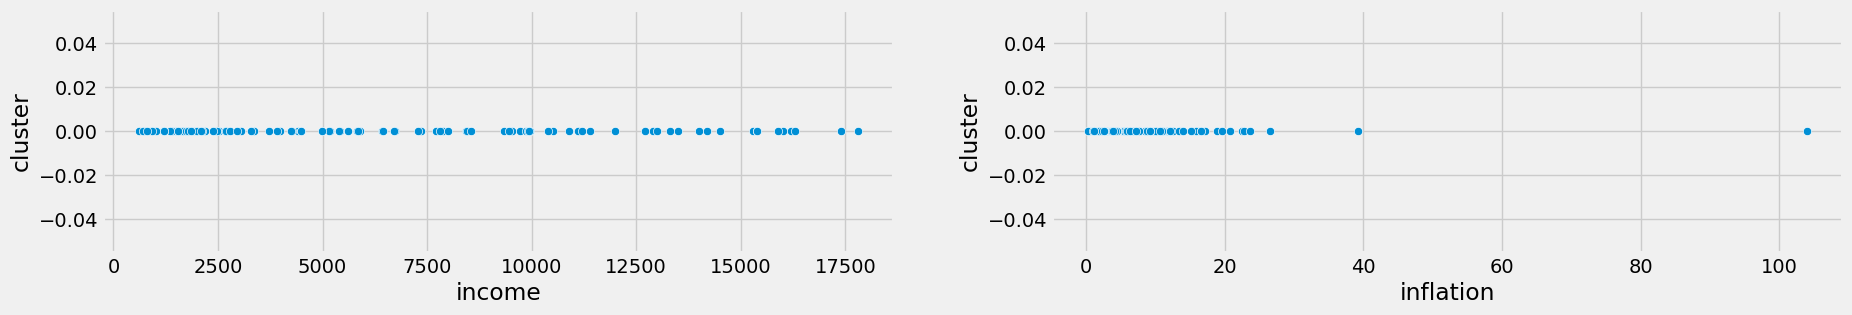

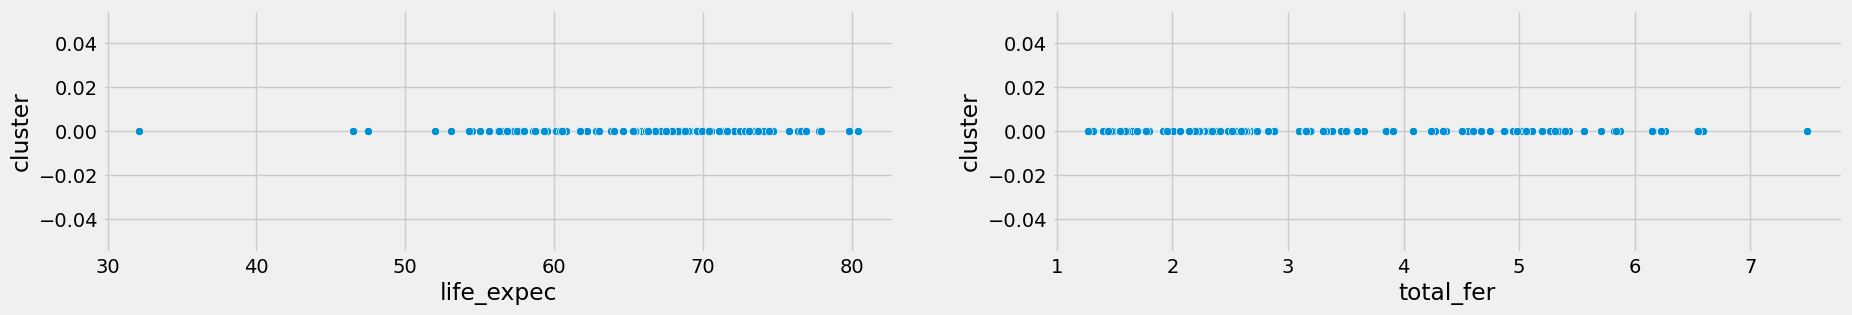

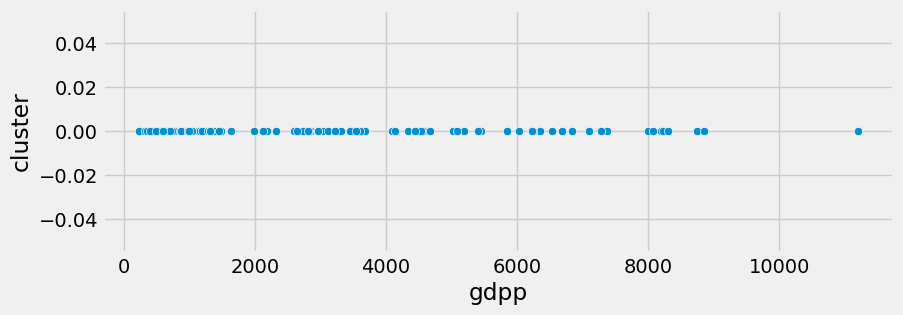

In [132]:
class1 = df.loc[df["cluster"]==0]
display(class1)

features = class1.columns.tolist()[2:]
i = 0
while i<9:
    fig = plt.figure(figsize=(20,3))
    plt.subplot(1,2,1)
    sns.scatterplot(x=features[i],y = "cluster",data =class1)
    i+=1
    if i == 9:
        break
    plt.subplot(1,2,2)
    sns.scatterplot(x=features[i],y="cluster",data =class1)
    i+=1
    plt.show()

,country,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,1,4.80,19.80,8.73,20.90,41400,1.16,82.00,1.93,51900
8,Austria,1,4.30,51.30,11.00,47.80,43200,0.87,80.50,1.44,46900
15,Belgium,1,4.50,76.40,10.70,74.70,41100,1.88,80.00,1.86,44400
23,Brunei,1,10.50,67.40,2.84,28.00,80600,16.70,77.10,1.84,35300
29,Canada,1,5.60,29.10,11.30,31.00,40700,2.87,81.30,1.63,47400
44,Denmark,1,4.10,50.50,11.40,43.60,44000,3.22,79.50,1.87,58000
53,Finland,1,3.00,38.70,8.95,37.40,39800,0.35,80.00,1.87,46200
54,France,1,4.20,26.80,11.90,28.10,36900,1.05,81.40,2.03,40600
58,Germany,1,4.20,42.30,11.60,37.10,40400,0.76,80.10,1.39,41800
68,Iceland,1,2.60,53.40,9.40,43.30,38800,5.47,82.00,2.20,41900


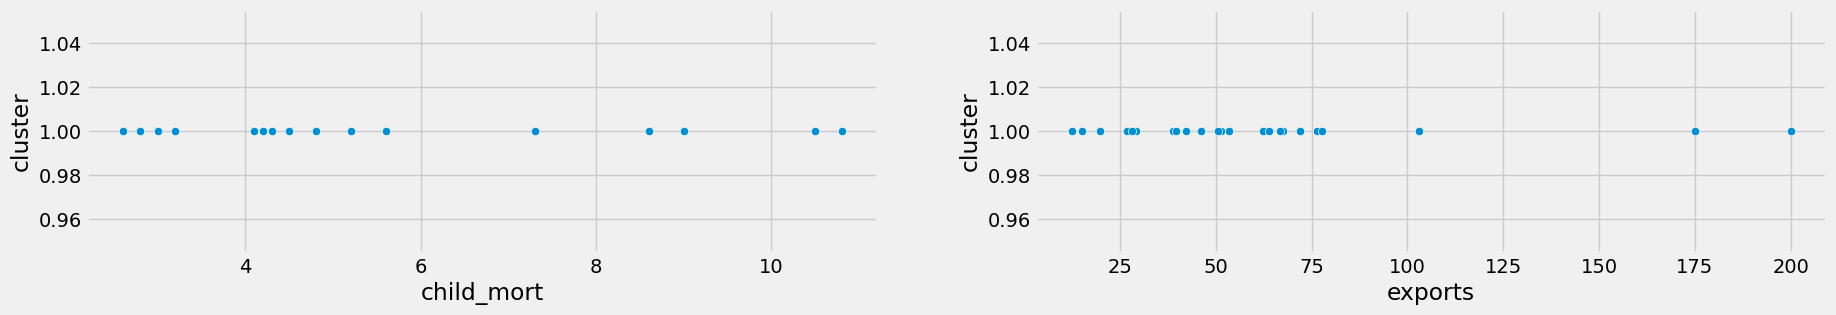

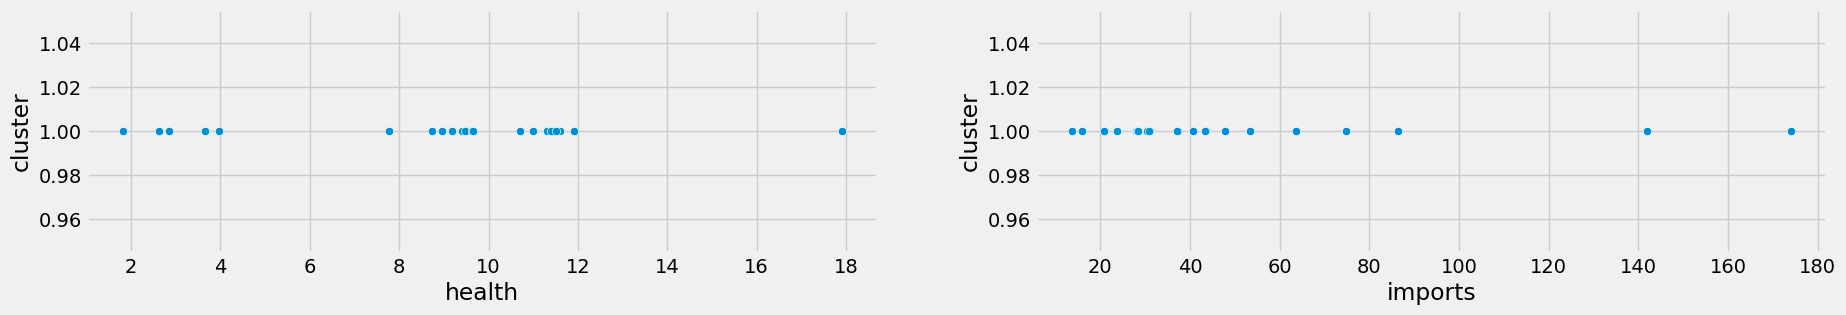

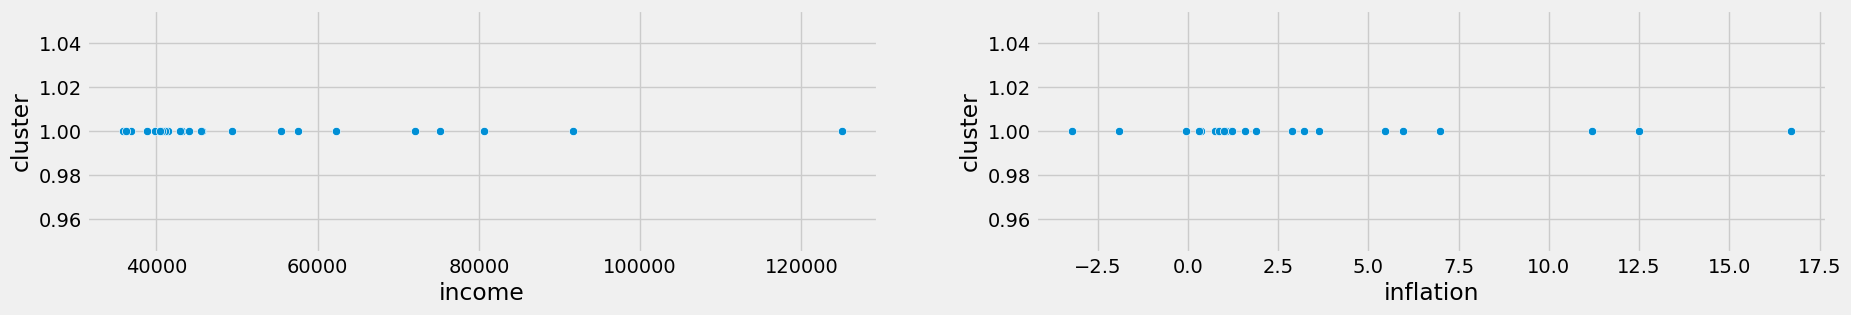

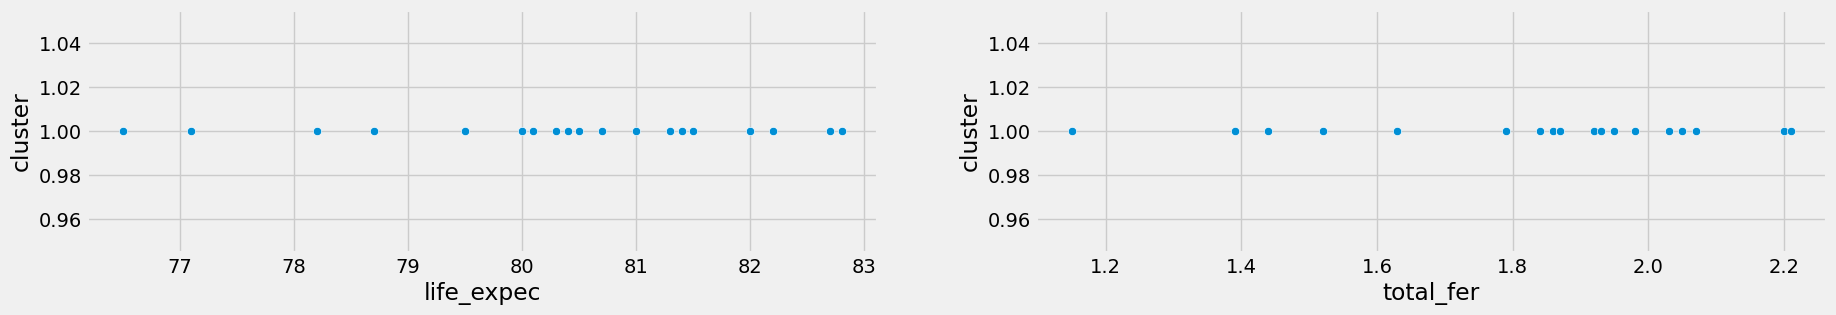

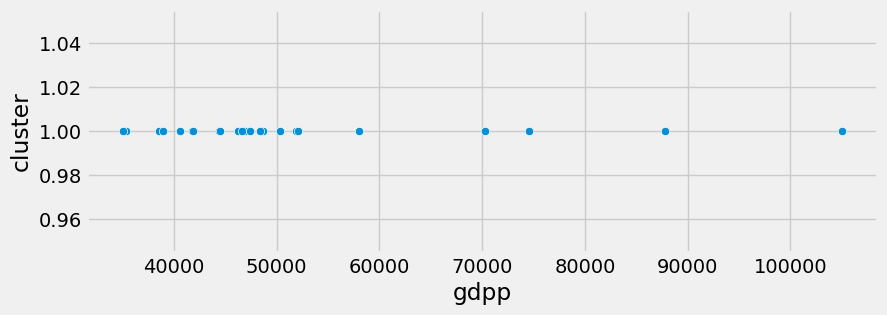

In [133]:
class2 = df.loc[df["cluster"]==1]
display(class2)

features = class2.columns.tolist()[2:]
i = 0
while i<9:
    fig = plt.figure(figsize=(20,3))
    plt.subplot(1,2,1)
    sns.scatterplot(x=features[i],y = "cluster",data =class2)
    i+=1
    if i == 9:
        break
    plt.subplot(1,2,2)
    sns.scatterplot(x=features[i],y="cluster",data =class2)
    i+=1
    plt.show()

,country,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,Antigua and Barbuda,2,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
5,Argentina,2,14.50,18.90,8.10,16.00,18700,20.90,75.80,2.37,10300
10,Bahamas,2,13.80,35.00,7.89,43.70,22900,-0.39,73.80,1.86,28000
11,Bahrain,2,8.60,69.50,4.97,50.90,41100,7.44,76.00,2.16,20700
13,Barbados,2,14.20,39.50,7.97,48.70,15300,0.32,76.70,1.78,16000
33,Chile,2,8.70,37.70,7.96,31.30,19400,8.96,79.10,1.88,12900
41,Croatia,2,5.50,37.60,7.76,38.10,20100,0.82,76.30,1.55,13500
42,Cyprus,2,3.60,50.20,5.97,57.50,33900,2.01,79.90,1.42,30800
43,Czech Republic,2,3.40,66.00,7.88,62.90,28300,-1.43,77.50,1.51,19800
49,Equatorial Guinea,2,111.00,85.80,4.48,58.90,33700,24.90,60.90,5.21,17100


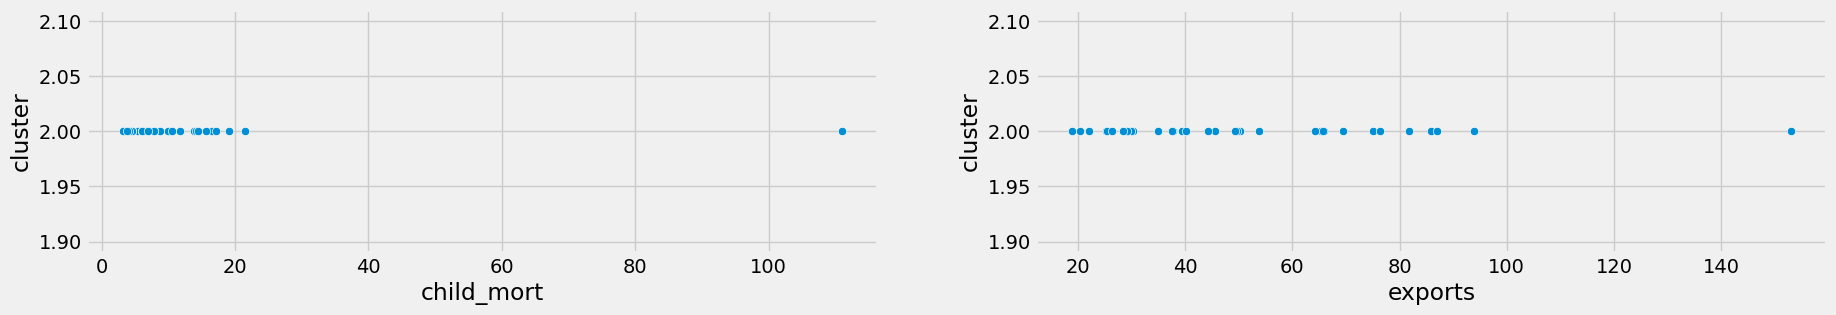

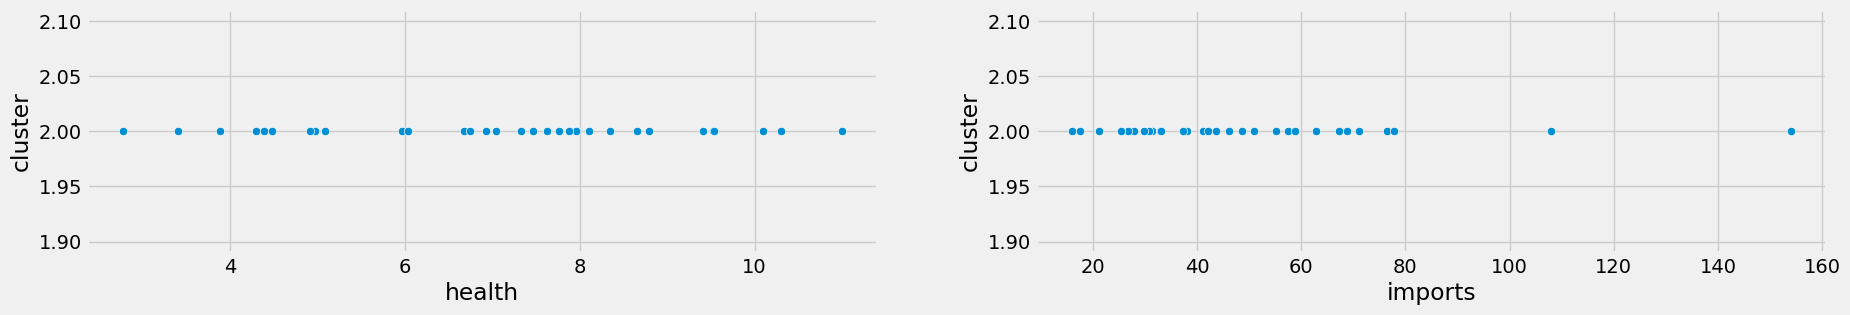

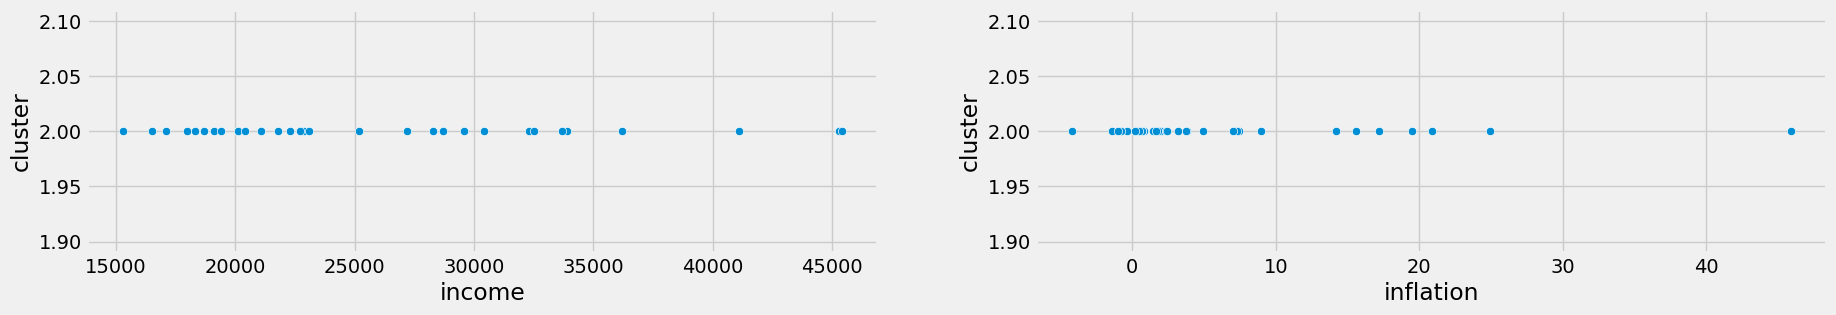

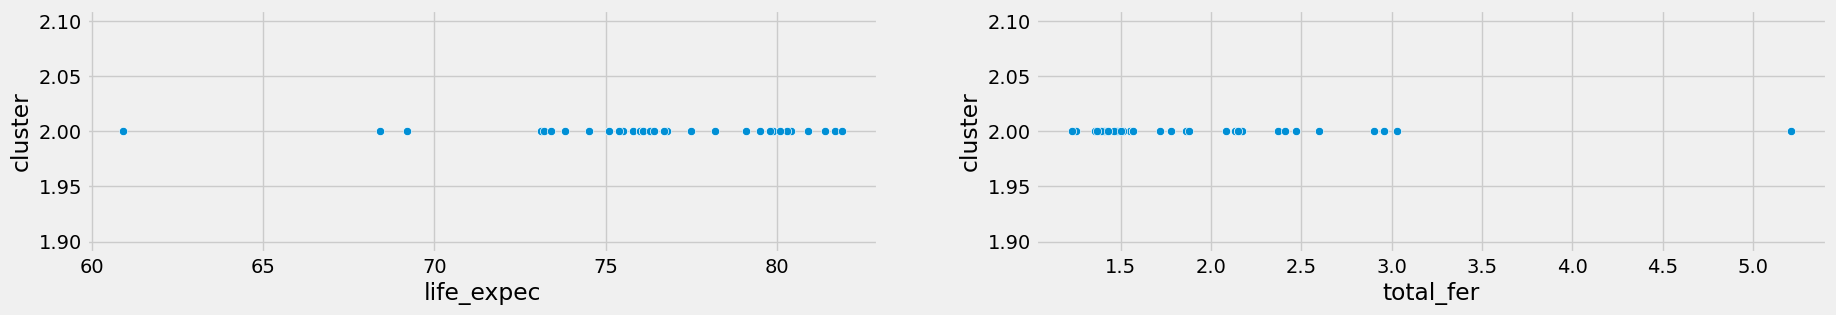

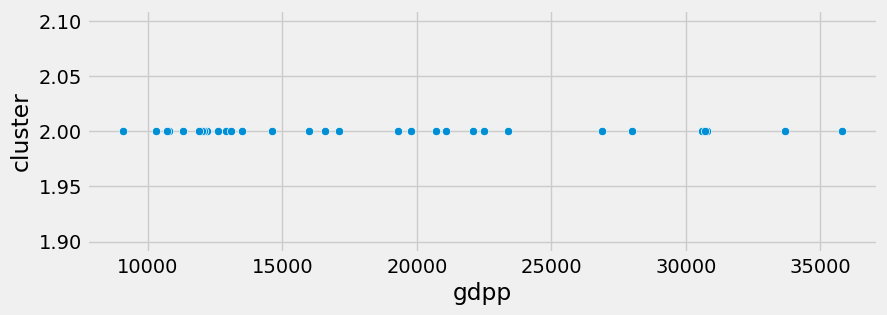

In [134]:
class3 = df.loc[df["cluster"]==2]
display(class3)

features = class3.columns.tolist()[2:]
i = 0
while i<9:
    fig = plt.figure(figsize=(20,3))
    plt.subplot(1,2,1)
    sns.scatterplot(x=features[i],y = "cluster",data =class3)
    i+=1
    if i == 9:
        break
    plt.subplot(1,2,2)
    sns.scatterplot(x=features[i],y="cluster",data =class3)
    i+=1
    plt.show()

In [103]:
# print with 2 decimal positions
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [110]:
classes = [class1,class2,class3]

result = pd.DataFrame({
   'Class': [],
   'child_mort': [],
   'exports': [],
   'health': [],
   'imports': [],
   'income': [],
   'inflation': [],
   'life_expec': [],
   'total_fer': [],
   'gdpp': []
})


for cls in classes:
    class_id = str(int(cls["cluster"].iloc[0]))
    child_mort = str(int(cls["child_mort"].min())) + " - " + str(int(cls["child_mort"].max()))
    exports = str(int(cls["exports"].min())) + " - " + str(int(cls["exports"].max()))
    health = str(int(cls["health"].min())) + " - " + str(int(cls["health"].max()))
    imports = str(int(cls["imports"].min())) + " - " + str(int(cls["imports"].max()))
    income = str(int(cls["income"].min())) + " - " + str(int(cls["income"].max()))
    inflation = str(int(cls["inflation"].min())) + " - " + str(int(cls["inflation"].max()))
    life_expec = str(int(cls["life_expec"].min())) + " - " + str(int(cls["life_expec"].max()))
    total_fer = str(int(cls["total_fer"].min())) + " - " + str(int(cls["total_fer"].max()))
    gdpp = str(int(cls["gdpp"].min())) + " - " + str(int(cls["gdpp"].max()))


    dataframe_row = {
        "Class": int(cls["cluster"].iloc[0]),
        "child_mort": child_mort,
        "exports": exports,
        "health": health,
        "imports": imports,
        "income": income,
        "inflation": inflation,
        "life_expec": life_expec,
        "total_fer": total_fer,
        "gdpp": gdpp
    }

    result = pd.concat([result, pd.DataFrame([dataframe_row])])
    

result


,Class,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,5 - 208,0 - 85,1 - 14,0 - 101,609 - 17800,0 - 104,32 - 80,1 - 7,231 - 11200
0,1,2 - 10,12 - 200,1 - 17,13 - 174,35800 - 125000,-3 - 16,76 - 82,1 - 2,35000 - 105000
0,2,3 - 111,18 - 153,2 - 11,16 - 154,15300 - 45400,-4 - 45,60 - 81,1 - 5,9070 - 35800


Inflación, total_fer, gdpp, expresión e ingresos expresan la situación de desarrollo económico y la mortalidad infantil, la esperanza de vida, el total_fer y la salud muestran la situación de vida. Los países en desarrollo tienen un rango de ingresos, exportaciones, gdpp, esperanza de vida e importaciones más bajos y una tasa de mortalidad infantil, inflación, total_fer y salud más altas que los países desarrollados, por lo tanto, necesitan más ayuda financiera.

De acuerdo con los resultados del siguietne dataframe, la clase 1 involucra a países en desarrollo, la clase 2 muestra países desarrollados y la clase 3 indica países de rango medio, por lo tanto, debemos ayudar a los países que pertenecen a la clase 1.

# PCA en imágenes

Vamos a emplear el algoritmo de PCA en imágenes para reducir su dimensionalidad.

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import linalg
%matplotlib inline

# Default figure size
plt.rcParams['figure.figsize'] = (12,8)

## Carga de datos

In [ ]:
if not os.path.exists('lfwcrop_grey'):
    !wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
    !unzip 'lfwcrop_grey.zip'

filenames = []
images = []

for filename in os.listdir('lfwcrop_grey/faces'):
    filenames.append(filename)
    image = np.array(Image.open(os.path.join('lfwcrop_grey/faces', filename)))
    images.append(image)

images = np.array(images)

# Rotate each image 90 degrees to the right
images = np.rot90(images, k=1, axes=(1,2))

print('Total Number of Faces: {}'.format(len(images)))
print(images.shape)

X = images.reshape(13233, 64*64)
print(X.shape)

El dataset se compone de 5000 imágenes de 64x64 píxeles en escala de grises, cada una de ellas representada como un vector de 1024 dimensiones.

En cada imagen se muestra la cara de una persona, centrada y ocupando la mayor parte de la imagen.

In [ ]:
# Visualizing the face images
fig = plt.figure()
fig.suptitle("Visualizing the faces dataset",fontsize = 20)
indices = np.random.choice(X.shape[0],54)
for i in range(54):
    img = X[indices[i]].reshape(64,64,order ='F')
    fig.add_subplot(6,9,i+1)
    plt.imshow(img,cmap = 'gray')
    plt.axis("off")
    
plt.show()


## Normalización

In [ ]:
# Function for mean normalizing and feature scaling 
def featureNormalize(X,mu,sigma):
    X_norm = np.apply_along_axis(np.subtract,1,X,mu)
    X_norm = np.apply_along_axis(np.divide,1,X_norm,sigma)
    return X_norm

In [ ]:
# Obtaining a normalized version of X 
mu = np.mean(X,axis =0)
sigma = np.std(X,axis =0)
X_norm = featureNormalize(X,mu,sigma)

print("mu.shape:", mu.shape)
print("sigma.shape:", sigma.shape)
print("X_norm.shape:", X_norm.shape)

### Obtención de los componentes principales

Vamos a calcular los componentes principales de los datos. 

Primero calculamos la matriz de covarianza de los datos.

A continuación calculamos los autovalores y autovectores de la matriz de covarianza, para ello usamos la función de numpy `np.linalg.svd`.

Esta función realiza SVD (Singular Value Decomposition) y devuelve los autovalores en orden descendente. Más explicación en los siguientes enlaces de la librería [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) y el siguiente [Blog](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d).

In [ ]:
# Function to run PCA on the dataset
def pca(X):
    m,n = X.shape
    Sigma = (1.0/m) * ((X.T).dot(X))
    U,S,V = linalg.svd(Sigma)
    
    return U,S 

In [ ]:
# Runs PCA and obtains Eigenvectors U and eigenvalues S
U,S = pca(X_norm)
U.shape

Podemos visualizar los primeros 42 autovectores, los cuales representan las direcciones principales de variación de los datos.

Cada autovector representa una dirección en el espacio de 1024 dimensiones, y cada dirección representa una combinación lineal de los píxeles originales.

In [ ]:
# Visualizing top 42 Eigenvectors
fig = plt.figure()
fig.suptitle("Visualizing top 42 Eigenvectors",fontsize = 20)
for i in range(42):
    img = U[:,i].reshape(64,64,order= 'F')
    fig.add_subplot(6,7,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
plt.show()

A continuación, proyectamos los datos sobre los dos primeros autovectores.

Reduciremos la dimensión de cada imagen de 1024 a 100, proyectando cada imagen sobre los primeros 100 autovectores.

In [ ]:
# Function computes the reduced dimension data using the top K eigenvectors in U
# The data gets projected to K dimensions
def projectData(X,U,K):
    U_reduce = U[:,:K]
    Z = X.dot(U_reduce)
    return Z

In [ ]:
# Reducing the dimension of the data to only 100 using PCA, reduced dimension data is stored in Z
# Hence each face image is now described by only 100 features instead of 1024
K = 100
Z = projectData(X_norm,U,K)
Z.shape

In [ ]:
# Function to reconstruct an approximation to the original dataset 
# using data that has been reduced to K dimensions
def recoverData(Z,U,K):
    U_reduce = U[:,:K]
    X_rec = Z.dot(U_reduce.T)
    return X_rec    

In [ ]:
# Reconstructing the original data
X_rec = recoverData(Z,U,K)

In [ ]:
# Visualizing the reconstructed data
k = 0
fig = plt.figure(figsize=(14,9))
fig.suptitle("Visualizing the Reconstructed Data",fontsize = 20)
outer = gridspec.GridSpec(1,4)
for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(6,2,
            subplot_spec = outer[i])
    for j in range(12):
        ax = plt.Subplot(fig,inner[j])
        if j == 0:
            ax.set_title("                          Original--------Reconstructed")
        if j%2 == 0:
            img = X[indices[k]].reshape(64,64,order='F')
            
        else:
            img = X_rec[indices[k]].reshape(64,64,order='F')
            k = k+1
            
        ax.imshow(img,cmap='gray')
        ax.axis('off')
        fig.add_subplot(ax)

Se realiza una recuperación aproximada de los datos y se muestran una junto a otra las imágenes del rostro original y las proyectadas. A partir de la reconstrucción, podemos observar que se mantienen la estructura general y el aspecto del rostro, mientras que se pierden los detalles finos. Se trata de una notable reducción con un factor de 10.